In [1]:
%time
import os
import keras
from keras.datasets import mnist

from sklearn import datasets
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn import metrics

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


Using Theano backend.
/Users/hellen/.virtualenvs/se2017/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data();

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#training set
n_samples = 100; #n_samples for each class
x_0 = x_train[y_train==0][0:n_samples];
x_1 = x_train[y_train==1][0:n_samples];
x_2 = x_train[y_train==2][0:n_samples];
x_3 = x_train[y_train==3][0:n_samples];
x_4 = x_train[y_train==4][0:n_samples];
x_5 = x_train[y_train==5][0:n_samples];
x_6 = x_train[y_train==6][0:n_samples];
x_7 = x_train[y_train==7][0:n_samples];
x_8 = x_train[y_train==8][0:n_samples];
x_9 = x_train[y_train==9][0:n_samples];

x_train = np.concatenate((x_0,x_1,x_2,x_3, x_4, x_5, x_6, x_7, x_8, x_9), axis=0)

#labels training set
y_0 = y_train[y_train==0][0:n_samples];
y_1 = y_train[y_train==1][0:n_samples];
y_2 = y_train[y_train==2][0:n_samples];
y_3 = y_train[y_train==3][0:n_samples];
y_4 = y_train[y_train==4][0:n_samples];
y_5 = y_train[y_train==5][0:n_samples];
y_6 = y_train[y_train==6][0:n_samples];
y_7 = y_train[y_train==7][0:n_samples];
y_8 = y_train[y_train==8][0:n_samples];
y_9 = y_train[y_train==9][0:n_samples];

y_train = np.concatenate((y_0, y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8, y_9), axis=0)

#test set
n_samples_test = 10; #n_samples for each class
x_test_0 = x_test[y_test==0][0:n_samples_test]; 
x_test_1 = x_test[y_test==1][0:n_samples_test]; 
x_test_2 = x_test[y_test==2][0:n_samples_test]; 
x_test_3 = x_test[y_test==3][0:n_samples_test]; 
x_test_4 = x_test[y_test==4][0:n_samples_test]; 
x_test_5 = x_test[y_test==5][0:n_samples_test]; 
x_test_6 = x_test[y_test==6][0:n_samples_test]; 
x_test_7 = x_test[y_test==7][0:n_samples_test]; 
x_test_8 = x_test[y_test==8][0:n_samples_test]; 
x_test_9 = x_test[y_test==9][0:n_samples_test]; 

x_test = np.concatenate((x_test_0,x_test_1,x_test_2,x_test_3, x_test_4, 
                         x_test_5, x_test_6, x_test_7, x_test_8, x_test_9), axis=0)

# labels test set
y_test_0 = y_test[y_test==0][0:n_samples_test]; 
y_test_1 = y_test[y_test==1][0:n_samples_test]; 
y_test_2 = y_test[y_test==2][0:n_samples_test]; 
y_test_3 = y_test[y_test==3][0:n_samples_test]; 
y_test_4 = y_test[y_test==4][0:n_samples_test]; 
y_test_5 = y_test[y_test==5][0:n_samples_test]; 
y_test_6 = y_test[y_test==6][0:n_samples_test]; 
y_test_7 = y_test[y_test==7][0:n_samples_test]; 
y_test_8 = y_test[y_test==8][0:n_samples_test]; 
y_test_9 = y_test[y_test==9][0:n_samples_test]; 

y_test = np.concatenate((y_test_0, y_test_1, y_test_2, y_test_3, y_test_4, 
                         y_test_5, y_test_6, y_test_7, y_test_8, y_test_9), axis=0)

#normalization
x_train /= 255 
x_test /= 255

classes = np.unique(y_train);
num_classes = len(classes)

#convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

(1000, 'train samples')
(100, 'test samples')


In [3]:
def mean_inter_cluster_dist(cluster_centers, data):
    #cluster_centers = kmeans.cluster_centers_
    #mean_clusters = np.mean(cluster_centers,axis=0);
    mean_data = np.mean(data);
    n_clusters = np.shape(cluster_centers)[0];
    f_out = 0
    
    for k in range(n_clusters):
        #use mean of elements?
        squared_norm_diff = np.linalg.norm(cluster_centers[k]-mean_data,ord=2)**2
        #squared_norm_diff = np.linalg.norm(cluster_centers[k]-mean_clusters,ord=2)**2
        n_members = float(sum(output==k))
        f_out = f_out + n_members*squared_norm_diff

    return f_out

def davies_bouldin_index(cluster_centers, data, output): #output is the classification of the data
    #Davies-Bouldin Index
    #Dkj = (dk +dj)/dkj
    n_clusters = np.shape(cluster_centers)[0];
    new_DB = 0
    intra_mean = np.zeros([n_clusters,1])
    for k in range(n_clusters): #for each cluster
        dist = data[output==k]-cluster_centers[k]
        #norma 2 da distancia entre cada ponto do cluster e o centroid do msm
        intra_mean[k] = np.linalg.norm(dist,ord=2)/sum(output==k)
    Dkj = np.zeros([n_clusters,n_clusters])
    for k_cluster in range(n_clusters):
        for j_cluster in range(n_clusters):
            if (k_cluster==j_cluster):
                continue
            dist_clusters = np.linalg.norm(cluster_centers[k_cluster]-cluster_centers[j_cluster],ord=2)
            Dkj[k_cluster,j_cluster] = (intra_mean[k_cluster]+intra_mean[j_cluster])/dist_clusters
    
    DB_index = sum(np.max(Dkj,axis=0))/float(n_clusters)  
    
    return DB_index

In [4]:
min_clusters = 10
max_clusters = 16

data = x_train;

intra_cluster = np.zeros([max_clusters,1])
f_out = np.zeros([max_clusters,1])
silhouette = np.zeros([max_clusters,1])
DB_index = np.zeros([max_clusters,1])
#output = np.zeros([max_clusters,len(data)])

for i in range(min_clusters, max_clusters):
    
    kmeans = KMeans(n_clusters=i).fit(data)  
    output = kmeans.predict(data)
    
    silhouette[i] = metrics.silhouette_score(data, output)
    
    #intra-cluster distance - dispersao intra classe 
    intra_cluster[i] = kmeans.inertia_
    
    #mean inter-cluster distance - dispersao media extra classe
    cluster_centers = kmeans.cluster_centers_
    f_out[i] = mean_inter_cluster_dist(cluster_centers,data)

    #Davies-Bouldin Index
    #Dkj = (dk +dj)/dkj
    DB_index[i] = davies_bouldin_index(cluster_centers, data, output)



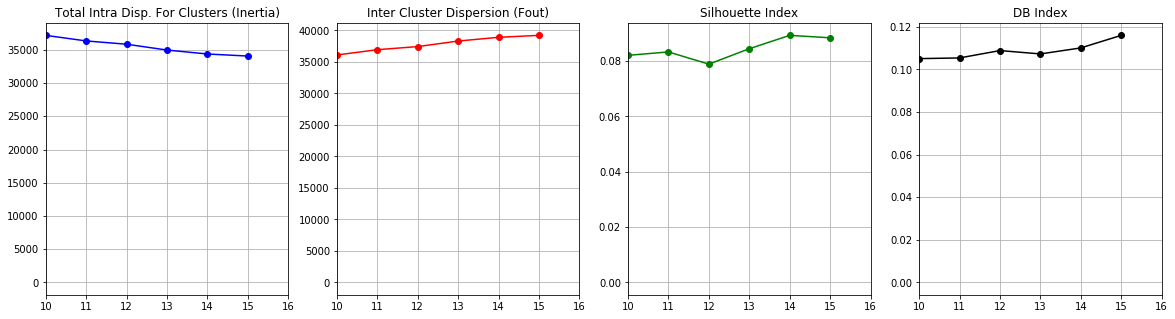

In [5]:
fig, ax = plt.subplots(figsize=(20,5),nrows=1, ncols=4)

ax[0].plot(range(max_clusters),intra_cluster,'bo-')
ax[0].set_xlim([min_clusters, max_clusters])
ax[0].set_title("Total Intra Disp. For Clusters (Inertia)")
ax[0].grid()

ax[1].plot(range(max_clusters),f_out,'ro-' ) #plot in the same graph as intra-cluster dispersion?
ax[1].set_xlim([min_clusters, max_clusters])
ax[1].set_title("Inter Cluster Dispersion (Fout)")
ax[1].grid()

ax[2].plot(range(max_clusters),silhouette,'go-')
ax[2].set_xlim([min_clusters, max_clusters])
ax[2].set_title("Silhouette Index")
ax[2].grid()

ax[3].plot(range(max_clusters),DB_index,'ko-')
ax[3].set_xlim([min_clusters, max_clusters])
ax[3].set_title("DB Index")
ax[3].grid()

1: 1
2: 1
3: 3
4: 18
5: 1
7: 22
9: 42
 
1: 47
2: 13
3: 3
4: 2
5: 1
6: 6
7: 3
8: 3
9: 1
 
0: 5
1: 1
2: 8
3: 1
4: 8
5: 36
6: 7
7: 3
8: 6
9: 7
 
0: 53
2: 2
3: 1
9: 1
 
0: 6
1: 1
3: 10
5: 18
6: 3
8: 29
9: 2
 
0: 1
2: 3
3: 4
5: 1
8: 53
 
0: 1
2: 50
5: 1
 
2: 6
3: 31
5: 19
6: 1
8: 6
9: 1
 
0: 2
2: 2
4: 2
5: 2
6: 78
 
2: 1
3: 2
7: 45
9: 6
 
2: 4
3: 2
4: 23
5: 1
6: 1
7: 23
9: 28
 
1: 50
2: 9
6: 1
7: 3
8: 1
9: 1
 
0: 32
3: 1
5: 1
6: 2
 
2: 1
3: 42
5: 19
8: 2
9: 1
 
4: 47
6: 1
7: 1
9: 10
 


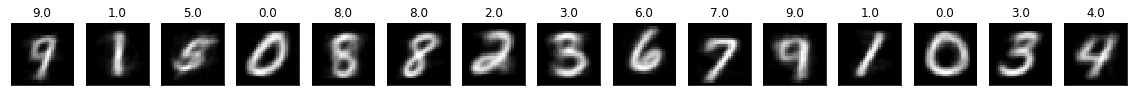

In [106]:
#showing cluster centers
n_clusters = np.shape(cluster_centers)[0]
most_freq = np.zeros(n_clusters)
for icluster in range(n_clusters):
    id_clusters = np.unique(output)
    labels = y_train[output==id_clusters[icluster]]
    
    occurences = np.unique(np.argmax(labels, axis=1))
    freq = np.bincount(np.argmax(labels, axis=1))

    for i in range(len(freq)):
        if (freq[i]):
            print (str(i) + ": " + str(freq[i]))
    print " "
    
    most_freq[icluster] = np.argmax(np.bincount(np.argmax(labels, axis=1)))
    
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
#plt.rcParams['xtick.labelsize'] = 18
#plt.rcParams['font.weight'] = 'bold'
#plt.rcParams['ytick.labelsize'] = 18

nrows = 1
ncols = 15
fig, ax = plt.subplots(figsize=(20,5),nrows=nrows, ncols=ncols)

for cluster in range(np.shape(cluster_centers)[0]):
    img = cluster_centers[cluster];
    img = img.reshape(28,28);

    ax[cluster].imshow(img,cmap='gray',interpolation="nearest")
    fig.axes[cluster].set_title(str(most_freq[cluster]))
    fig.axes[cluster].get_xaxis().set_visible(False)
    fig.axes[cluster].get_yaxis().set_visible(False)
 

In [97]:
a = [1,1,1,20]
print np.argmax(a, axis=0)
print np.bincount(a)

3
[0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [61]:
labels = y_train[output==2]
print np.argmax(np.bincount(np.argmax(labels, axis=1)))

5


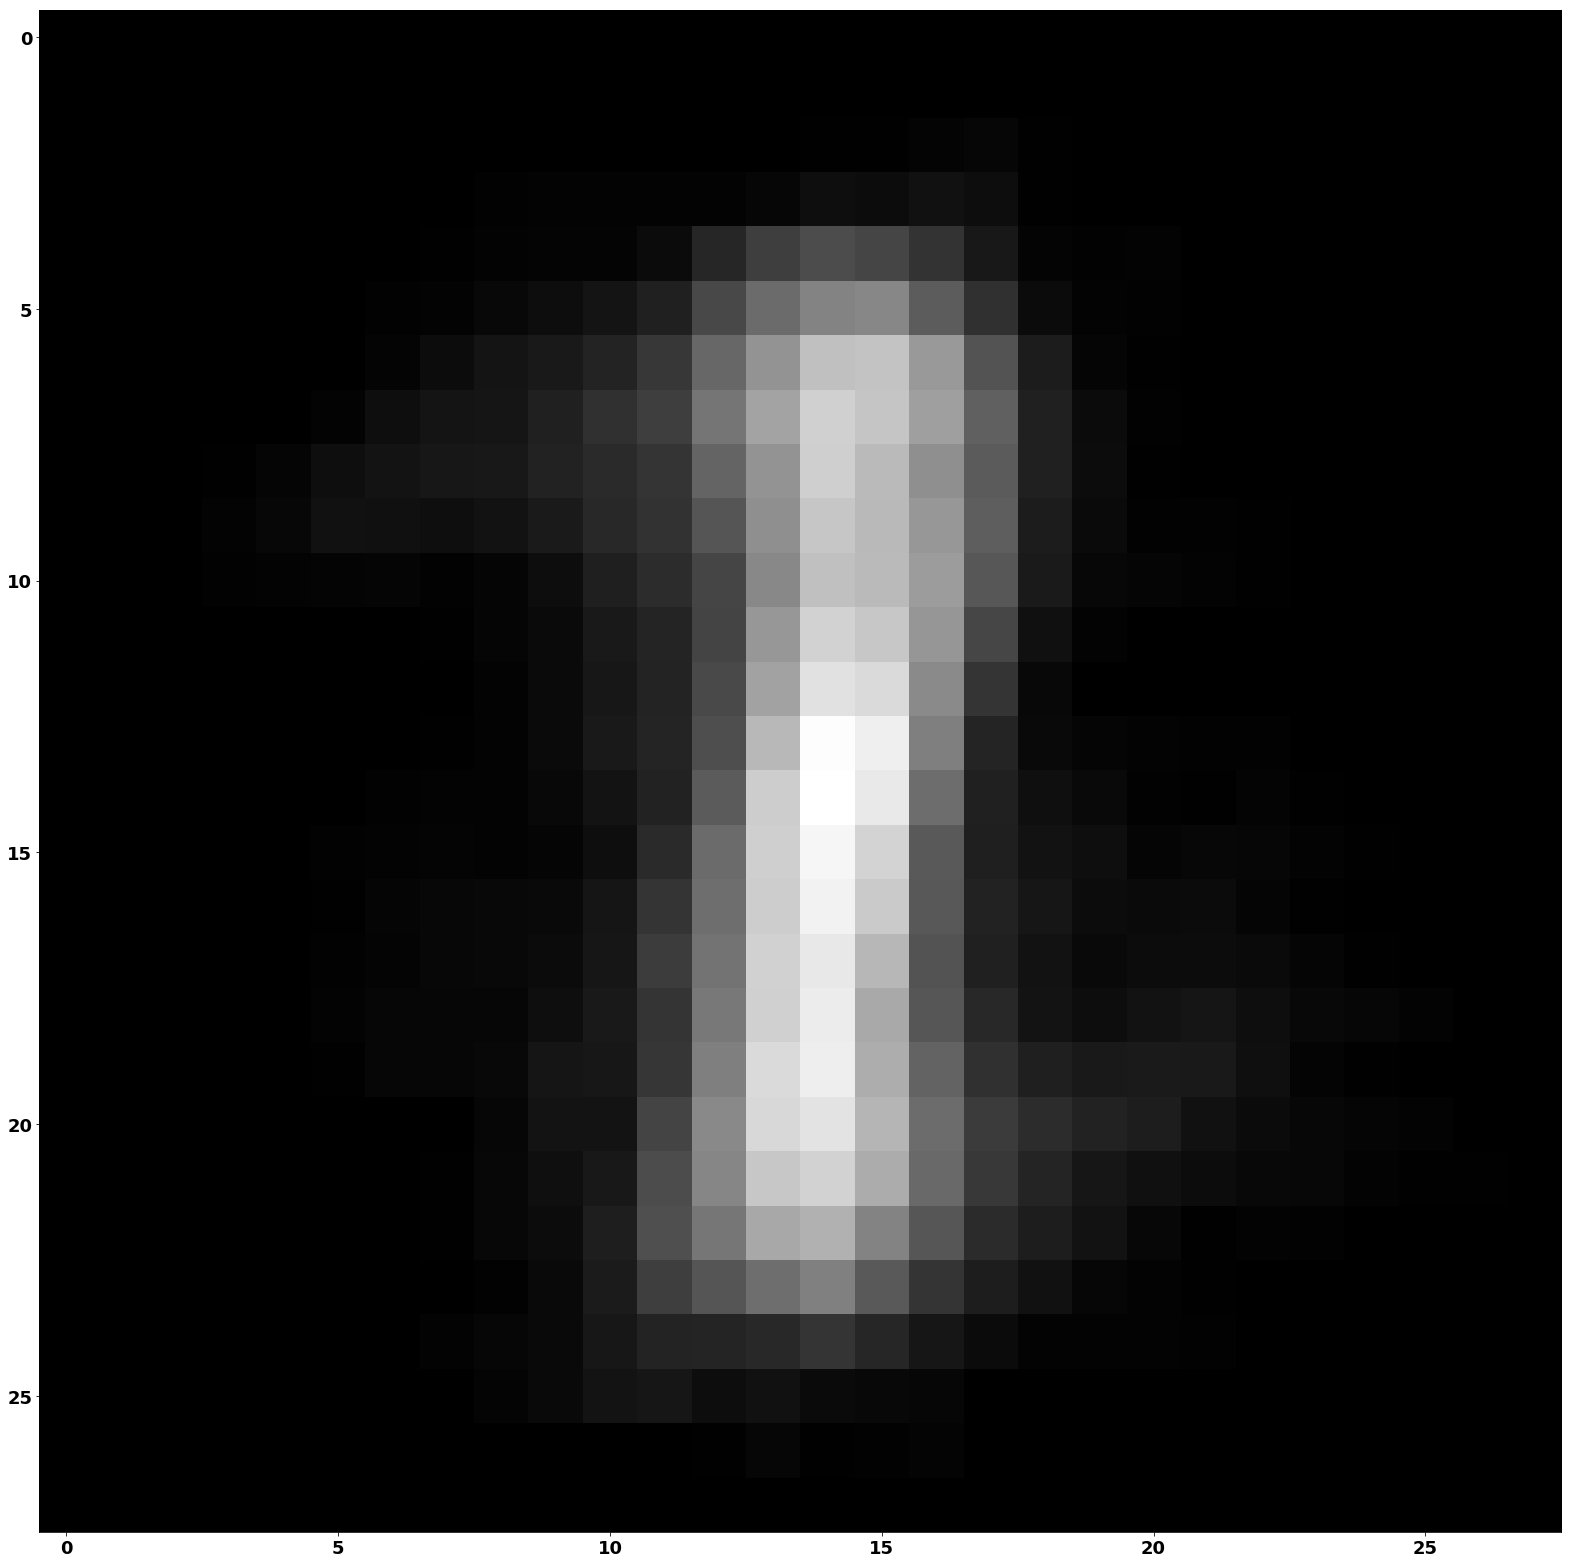

In [48]:
#showing character

img = cluster_centers[1];
img = img.reshape(28,28);

#from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18


fig, ax = plt.subplots(figsize=(28,28),nrows=1, ncols=1)
ax.imshow(img,cmap='gray',interpolation="nearest")